Do the following on titanic dataset 
1. Load the dataset into python environment 
2. Do all the necessary pre-processing steps 
3. Create kNN and SVM models 
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the 
average accuracy score of the models

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [396]:
data = pd.read_csv(r"C:\Users\ACER\Downloads\titanic_dataset .csv")

In [397]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [398]:
data.shape

(891, 12)

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [400]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [401]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [402]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [403]:
# Fill missing values with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Fill missing values with the mode for categorical columns
data.fillna(data.mode().iloc[0], inplace=True)


# Verify the filled missing values
null_values = data.isnull().sum()
print("\nAfter filling missing values:")
print(null_values)


After filling missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\3094621073.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [404]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Outlier Handling

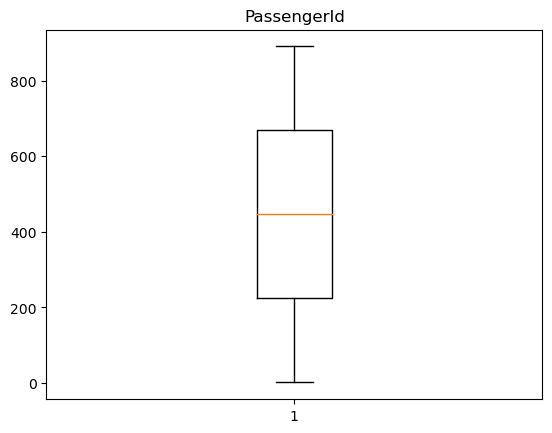

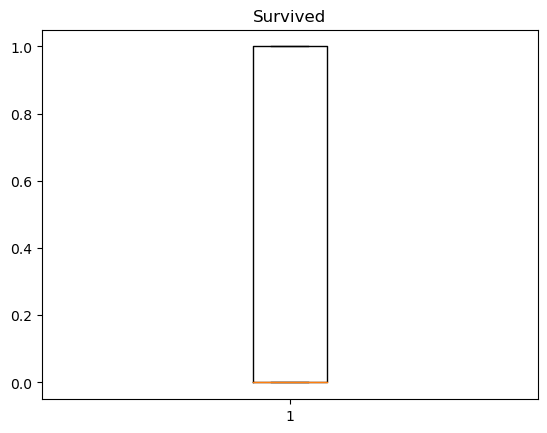

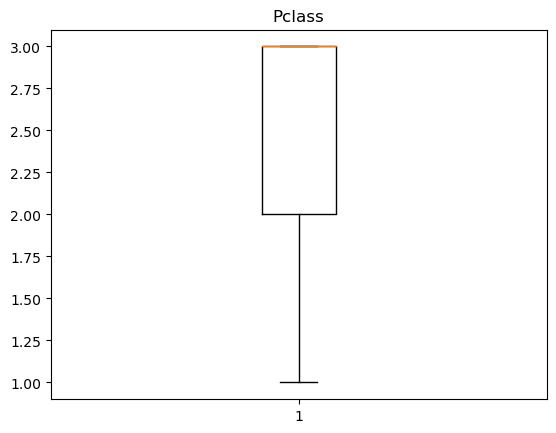

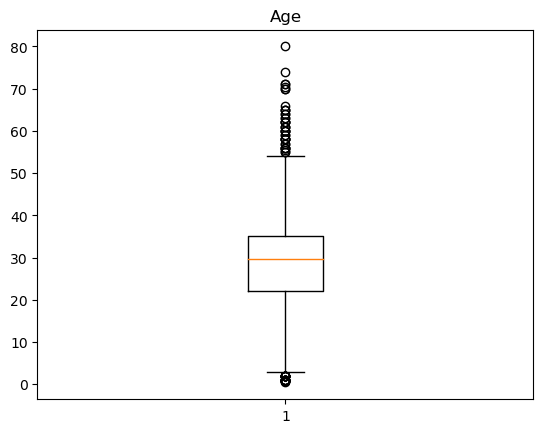

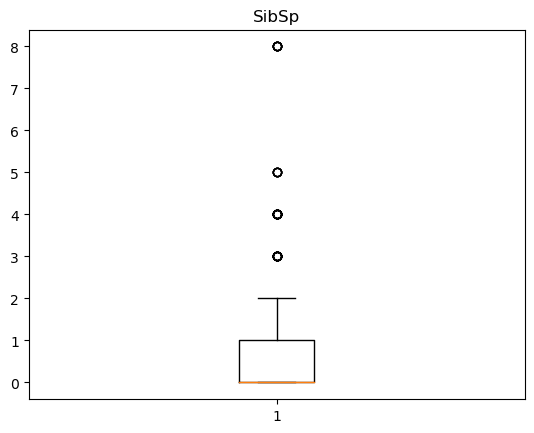

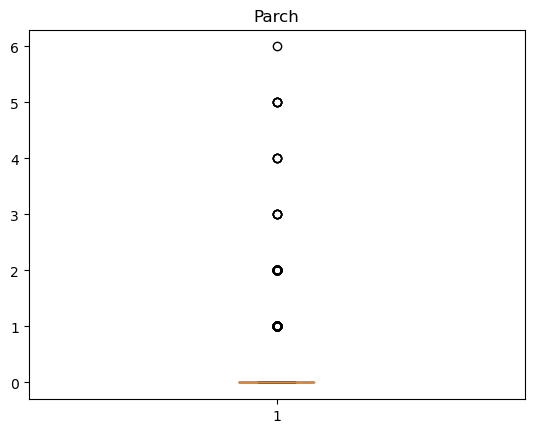

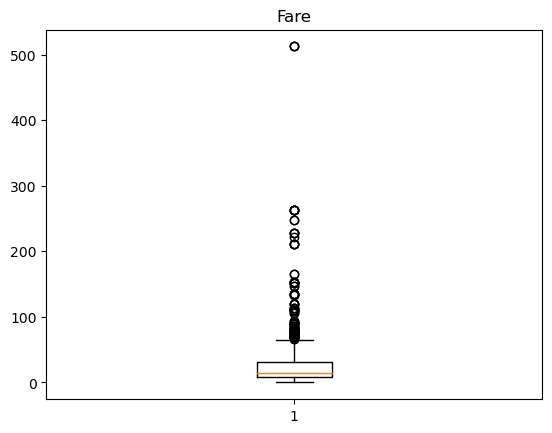

In [405]:
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch','Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [406]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\1385708954.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\1385708954.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\1385708954.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

In [407]:
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [408]:
data['Age'].median()

29.69911764705882

In [409]:
IQR = Q3-Q1

In [410]:
print(IQR)

13.0


In [411]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [412]:
print(up_lim)
print(low_lim)

54.5
2.5


In [413]:
outliers = []
for x in data['Age']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [414]:
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [415]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\755816321.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\755816321.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\755816321.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [416]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [417]:
data['SibSp'].median()

0.0

In [418]:
IQR = Q3-Q1

In [419]:
print(IQR)

1.0


In [420]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [421]:
print(up_lim)
print(low_lim)

2.5
-1.5


In [422]:
outliers = []
for x in data['SibSp']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [423]:
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [424]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\159444324.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\159444324.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\159444324.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'm

In [425]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [426]:
data['Fare'].median()

14.4542

In [427]:
IQR = Q3-Q1

In [428]:
print(IQR)

23.0896


In [429]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [430]:
print(up_lim)
print(low_lim)

65.6344
-26.724


In [431]:
outliers = []
for x in data['Fare']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [432]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [433]:
Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(data['Parch'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\897566285.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\897566285.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\897566285.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [434]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [435]:
data['Parch'].median()

0.0

In [436]:
IQR = Q3-Q1

In [437]:
print(IQR)

0.0


In [438]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [439]:
print(up_lim)
print(low_lim)

0.0
0.0


In [440]:

# Define the lower and upper limits for flooring and capping
age_lower_limit = 54.5
age_upper_limit = 2.5
fare_lower_limit = 65.6344
fare_upper_limit =-26.724 
parch_lower_limit = 2.5
parch_upper_limit =  -1.5
sibsp_lower_limit = 0
sibsp_upper_limit = 0

# Apply flooring and capping on the respective columns
data['Age'] = data['Age'].clip(age_lower_limit, age_upper_limit)
data['Fare'] = data['Fare'].clip(fare_lower_limit, fare_upper_limit)
data['Parch'] = data['Parch'].clip(parch_lower_limit, parch_upper_limit)
data['SibSp'] = data['SibSp'].clip(sibsp_lower_limit, sibsp_upper_limit)

# Display the modified dataframe
print("\nModified DataFrame:")
print(data.head())


Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      0   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      0   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0    0.0         A/5 21171   7.2500  B96 B98        S  
1    0.0          PC 17599  65.6344      C85        C  
2    0.0  STON/O2. 3101282   7.9250  B96 B98        S  
3    0.0            113803  53.1000     C123        S  
4    0.0           

In [441]:
# Drop irrelevant columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1)

In [442]:
X = data.drop('Survived',axis=1)
y = data['Survived']

Label Encoding

In [443]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
data['Sex'] = le.fit_transform(data[ 'Sex'])
                               
                                

In [448]:
# Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [458]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

kNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,25)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)
    